# Simulation data analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os.path import join
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

In [46]:
res_path = '../../results/nursing_homes'

In [161]:
def get_image_turnonver_time(df, subset, metric):
    subset = df.loc[subset]
    img = np.zeros((4,4))
    screening_intervals = ['keine', 'ein mal\npro Woche', 'alle\n3 Tage', 'alle\n2 Tage']
    for i, p_index in enumerate(screening_intervals):
        for j, e_index in enumerate(screening_intervals):
            img[i, j] = subset.loc[p_index, e_index][metric] - 1
    return img

def plot_heatmap_turnover_time(ax, img, vmin, vmax):
    cmap = plt.get_cmap('coolwarm')
    #im = ax.imshow(img, origin='lower', vmin=np.floor(img.min()),
    #               vmax=np.ceil(img.max()), cmap=cmap)
    im = ax.imshow(img, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    
    ax.set_xticks(range(len(screening_intervals)))
    ax.set_yticks(range(len(screening_intervals)))
    ax.set_xticklabels(screening_intervals, fontsize=7)
    ax.set_yticklabels(screening_intervals, fontsize=7)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('Testfrequenz Mitarbeitende')
    ax.set_ylabel('Testfrequenz Bewohner')
    
    return im

frequency_name_map = {np.nan:'keine',
              2:'alle\n2 Tage',
              3:'alle\n3 Tage',
              7:'ein mal\npro Woche'}

test_name_map = {'same_day_antigen':'same-day antigen', 'one_day_PCR':'ein Tag PCR',
             'two_day_PCR':'zwei Tage PCR', 'same_day_PCR':'same-day PCR',
             'same_day_LAMP':'same-day LAMP'}

metric_name_map = {'infected_residents_mean':'Folgefälle Bewohner (Mittelwert)',
                   'infected_residents_median':'Folgefälle Bewohner (Median)',
                   'R0_mean':'$R_0$',
                   'R0_mean':'$R_0$'}

index_case_map = {'single_employee':'Indexfälle durch Mitarbeitende',
                  'single_resident':'Indexfälle durch Bewohner*innen'}

screening_intervals = ['keine', 'ein mal\npro Woche', 'alle\n3 Tage', 'alle\n2 Tage']

## Follow up interval

In [153]:
def get_image_follow_up_interval(df, subset, metric):
    subset = df.loc[subset]
    img = np.zeros((3,5))
    follow_ip_intervals = [6, 5, 4, 3, 2]
    test_types = ['same_day_PCR', 'one_day_PCR', 'two_day_PCR']
    for i, t_index in enumerate(test_types):
        for j, f_index in enumerate(follow_ip_intervals):
            img[i, j] = subset.loc[t_index, f_index][metric] - 1
    return img

def plot_heatmap_follow_up_interval(ax, img, vmin, vmax):
    cmap = plt.get_cmap('coolwarm')
    #im = ax.imshow(img, origin='lower', vmin=np.floor(img.min()),
    #               vmax=np.ceil(img.max()), cmap=cmap)
    im = ax.imshow(img, origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    
    follow_up_intervals = [6, 5, 4, 3, 2]
    test_types = ['same_day_PCR', 'one_day_PCR', 'two_day_PCR']
    test_type_names = [test_name_map[test] for test in test_types]
    ax.set_xticks(range(len(follow_up_intervals)))
    ax.set_yticks(range(len(test_type_names)))
    ax.set_xticklabels(follow_up_intervals, fontsize=7)
    ax.set_yticklabels(test_type_names, fontsize=7)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('Follow-up scan interval')
    ax.set_ylabel('Test turnover time')
    
    return im

In [154]:
sim_name = 'follow_up_interval'
N = 200
data = pd.read_csv(join(res_path,'simulation_results/{}_N{}.csv'.format(sim_name, N)))

tuples = [(r['index_case_mode'], r['test_type'], r['follow_up_interval'])\
             for i,r in data.iterrows()]
index = pd.MultiIndex.from_tuples(tuples,\
                        names=['index_case_mode', 'test_type', 'follow_up_interval'])
data = data.set_index(index)

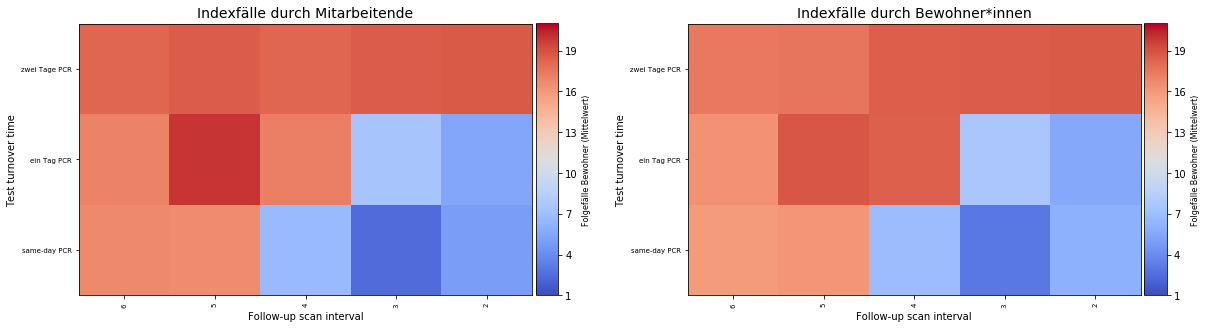

In [156]:
metric = 'infected_residents_mean'
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

vmin = 1
vmax = 21
tickstep = 3


for ax, index_case_mode in zip(axes, data['index_case_mode'].unique()):
    img = get_image_follow_up_interval(data, index_case_mode, metric)
    img_plot = plot_heatmap_follow_up_interval(ax, img, vmin, vmax)

    # colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    #cbar = fig.colorbar(img_plot, cax=cax, orientation='vertical',\
    #                ticks=np.arange(np.floor(img.min()), np.ceil(img.max()) + 1))
    cbar = fig.colorbar(img_plot, cax=cax, orientation='vertical',\
                    ticks=np.arange(vmin, vmax + 1, tickstep))
    #cbar.ax.set_yticklabels(['{:d}'.format(int(i)) for \
    #                i in np.arange(np.floor(img.min()), np.ceil(img.max()) + 1)])
    cbar.set_label('{}'.format(metric_name_map[metric]), fontsize=8)

    ax.set_title('{}'\
            .format(index_case_map[index_case_mode]), fontsize=14)

plt.savefig(join(res_path, 'plots/{}_{}.pdf'.format(sim_name, metric)),
       transparent=True)